In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

# Toggle cell visibility
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Promijeni vidljivost <a href="javascript:code_toggle()">ovdje</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

## Prijenosne funkcije

U sljedećem ćemo primjeru analizirati formulaciju prijenosnih funkcija. Iako se koriste u raznim poljima, u teoriji automatskog upravljanja prijenosne funkcije opisuju karakteristike prijenosa frekvencije linearnog vremenski nepromjenjivog (engl. Linear Time-invariant; LTI) sustava.

Općenito, prijenosna funkcija opisuje odnos između Laplaceove transformacije ulaznih $u(t)$ i izlaznih $y(t)$ signala:

$$U(s)=\mathcal{L}\{u(t)\} \quad Y(s)=\mathcal{L}\{y(t)\}$$

$$Y(s)=G(s)U(s)$$

<img src="Images/tf.png" width="30%" />

U slučaju sustava LTI, prijenosna funkcija može se opisati kao razlomak dva polinoma:

$$G(s)=\frac{\sum\limits_{j=0}^{m}b_js^j}{\sum\limits_{i=0}^{n}a_is^i},$$

gdje je nazivnik $a(s)$ karakteristični polinom sustava.
<br> Normalizirajući komponente na $ a^n=1$, rezultirajući oblici su:

$$a(s) = s^n + a_{n-1}s^{n-1} + a_{n-2}s^{n-2} + ... + a_1s^1 + a_0$$
$$b(s) = b_ms^m + b_{m-1}s^{m-1} + b_{m-2}s^{m-2} + ... + b_1s^1 + b_0$$

Za fizičke sustave, stupanj brojnika je manji od stupnja nazivnika; takav se tip naziva strogo ispravnom prijenosnom funkcijom. U tom slučaju prijenos frekvencije konvergira k nuli u beskonačnosti.


<br><b>Sastavite prijenosnu funkciju odabirom polinomskih članova!</b>

In [2]:
b = {}
a = {}

b[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

a[0] = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[5] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

def transfer_function(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):

    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    global b
    
    if a5 == 0:
        b[4].disabled=True
        b4c = 0
    else:
        b[4].disabled=False
        
    if a5 == 0 and a4==0:
        b[3].disabled=True
        b3c = 0
    else:
        b[3].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0:
        b[2].disabled=True
        b2c = 0
    else:
        b[2].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b[1].disabled=True
        b1c = 0
    else:
        b[1].disabled=False   
    
    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function

    print('Rezultirajuća prijenosna funkcija:')
    print(G)

input_data = w.interactive_output(transfer_function, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                                                      'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

display(w.HBox([w.VBox([w.Label('$G(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
        w.VBox([w.HBox([b[4], w.Label('$s^4+$'), b[3], w.Label('$s^3+$'), b[2], w.Label('$s^2+$'),
                    b[1], w.Label('$s+$'), b[0]], layout=w.Layout(justify_content='center')),
                    w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                           layout=w.Layout(justify_content='center')),
                    w.HBox([a[5], w.Label('$s^5+$'), a[4], w.Label('$s^4+$'), a[3], w.Label('$s^3+$'), a[2], w.Label('$s^2+$'),
                    a[1], w.Label('$s+$'), a[0]], layout=w.Layout(justify_content='center')) ],
               layout=w.Layout(width='70%'))], layout=w.Layout(justify_content='center') ), input_data)

Output()

Rješenja polinomskih izraza u brojniku i nazivniku nazivaju se nule i polovi sustava, respektivno. Pomoću njih se može utvrditi stabilnost sustava i procijeniti njegove performanse.

I nule i polovi su ili realni brojevi ili kompleksno konjugirani parovi (ako su diferencijalne jednadžbe sustava zasnovane na realnim vrijednostima).

<br><b>
    Eksperimentirajte s članovima polinoma i promatrajte promjene na dijagramu polova i nula!</b>

<IPython.core.display.Javascript object>


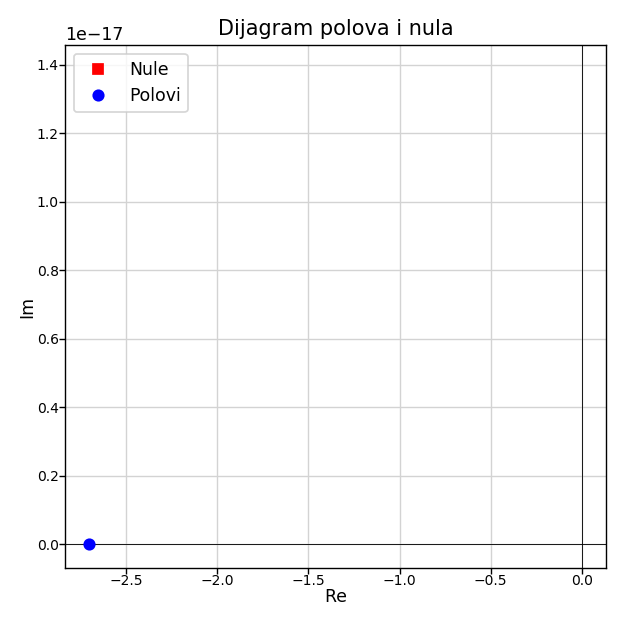

Output()

In [3]:
fig1, (f1_ax1) = plt.subplots(1, 1)
fig1.set_size_inches((5, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], 'rs')
f1_line2, = f1_ax1.plot([], [], 'bo') 

f1_ax1.axhline(y=0, color='k', lw=0.5)
f1_ax1.axvline(x=0, color='k', lw=0.5)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax1.autoscale(enable=True, axis='both')

f1_ax1.set_title('Dijagram polova i nula', fontsize=12)
f1_ax1.set_xlabel('Re', labelpad=0, fontsize=10)
f1_ax1.set_ylabel('Im', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.legend([f1_line1, f1_line2], ['Nule', 'Polovi'])

def pz_map(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    p = c.pole(G)  # Poles
    z = c.zero(G)  # Zeros
    
    px = [x.real for x in p] 
    py = [x.imag for x in p]
    
    zx = [x.real for x in z]
    zy = [x.imag for x in z]
    
    global f1_line1, f1_line2
    
    try:
        f1_ax1.lines.remove(f1_line1)
        f1_ax1.lines.remove(f1_line2)
    except:
        pass
    
    f1_line1, = f1_ax1.plot(zx, zy, 'rs') 
    f1_line2, = f1_ax1.plot(px, py, 'bo')
    
    f1_ax1.relim()
    f1_ax1.autoscale_view()
    
    
    
w.interactive_output(pz_map, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

Odgovarajuća vrijednost prijenosne funkcije u vremenskoj domeni je impulsni odziv: $g(t)$. Kako je Laplaceova transformacija Diracove delta funkcije konstanta (1), prijenosna funkcija LTI sustava može se uskladiti sa svojim impulsnim odzivom.

$$\mathcal{L}\{\delta(t)\} = 1$$

$$1\cdot G(s) \; \xrightarrow{\mathcal{L}^{-1}} \; \delta(t)*g(t)$$

$$Y(s) = G(s)U(s) \; \xrightarrow{\mathcal{L}^{-1}} \; y(t) = \int\limits_{-\infty}^{\infty}g(t-\tau)u(\tau) d\tau,$$

gdje se, prema pravilima Laplaceove transformacije, množenje u frekvencijskoj domeni podudara s konvolucijom u vremenskoj domeni, a konvoliranje funkcije s Diracovom deltom vraća istu funkciju.

<br><b>Promatrajte promjene impulsnog odziva za različite konfiguracije!</b>

<IPython.core.display.Javascript object>


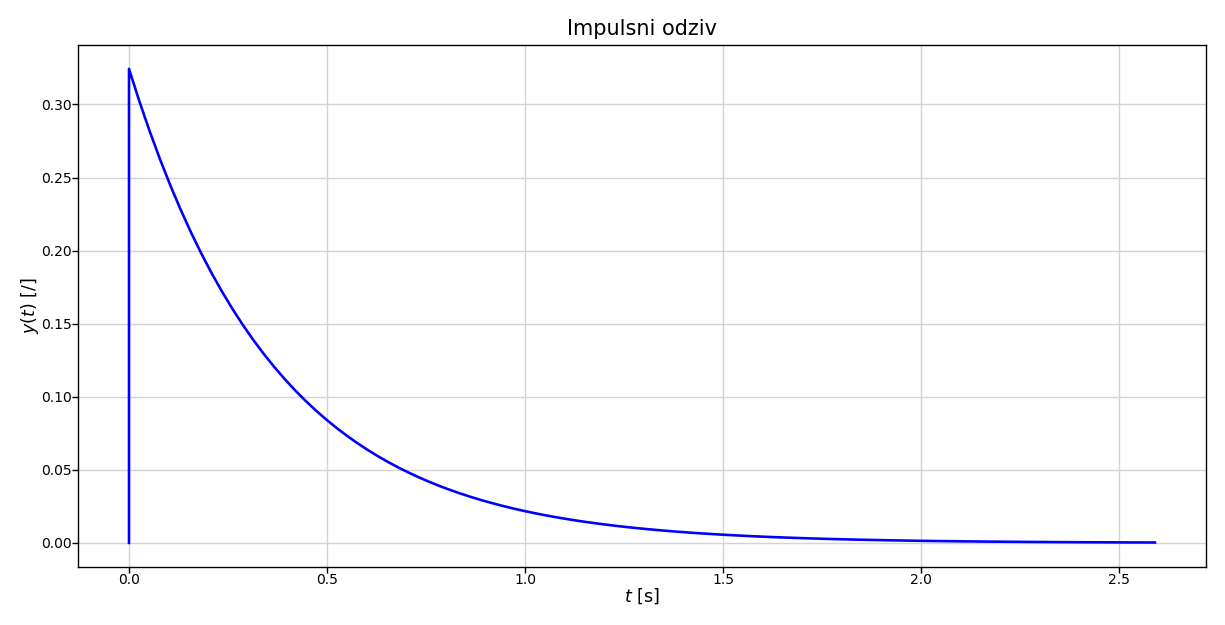

Output()

In [4]:
fig2, (f2_ax1) = plt.subplots(1, 1)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax1.autoscale(enable=True, axis='both')

f2_ax1.set_title('Impulsni odziv', fontsize=12)
f2_ax1.set_xlabel(r'$t$ [s]', labelpad=0, fontsize=10)
f2_ax1.set_ylabel(r'$y(t)$ [/]', labelpad=0, fontsize=10)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

def inp_resp(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    tout, yout = c.impulse_response(G)
    
    global f2_line1
    
    try:
        f2_ax1.lines.remove(f2_line1)
    except:
        pass

    f2_line1, = f2_ax1.plot(np.concatenate(([0], tout)), np.concatenate(([0], yout)), '-b') 
    
    f2_ax1.relim()
    f2_ax1.autoscale_view()
    
    
w.interactive_output(inp_resp, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})